# Module - 5

In [1]:
#import library packages
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load given dataset
data = pd.read_csv("CO2.csv")

In [4]:
df = data.dropna()

In [5]:
df = df.rename({'Model Year': 'Model_Year', 'Vehicle Class': 'Vehicle_Class', 'Engine Size(L)': 'Engine_Size',
                'Fuel Type': 'Fuel_Type', 'Fuel Consumption (City (L/100 km)': 'FC_City',
                'Fuel Consumption(Hwy (L/100 km))': 'FC_Hwy', 'Fuel Consumption(Comb (L/100 km))': 'FC_Comb_km',
                'Fuel Consumption(Comb (mpg))': 'FC_Comb_mpg', 'CO2 Emission Rating': 'CO2_Emission_Rating'}, axis=1)

In [6]:
df['CO2_Emission_Rating'].value_counts()

5    616
3    396
7    388
6    378
1    114
Name: CO2_Emission_Rating, dtype: int64

In [7]:
df['CO2_Emission_Rating'] = df.CO2_Emission_Rating.map({1:0,3:1,5:2,6:3,7:4})

In [8]:
df['CO2_Emission_Rating'].value_counts()

2    616
1    396
4    388
3    378
0    114
Name: CO2_Emission_Rating, dtype: int64

In [9]:
df.columns

Index(['Sl.No', 'Model_Year', 'Make', 'Model', 'Vehicle_Class', 'Engine_Size',
       'Cylinders', 'Transmission', 'Fuel_Type', 'FC_City', 'FC_Hwy',
       'FC_Comb_km', 'FC_Comb_mpg', 'CO2_Emission_Rating'],
      dtype='object')

In [10]:
del df['Sl.No']
del df['Model_Year']
del df['Make']
del df['Model']
del df['Vehicle_Class']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Engine_Size          1892 non-null   float64
 1   Cylinders            1892 non-null   int64  
 2   Transmission         1892 non-null   object 
 3   Fuel_Type            1892 non-null   object 
 4   FC_City              1892 non-null   float64
 5   FC_Hwy               1892 non-null   float64
 6   FC_Comb_km           1892 non-null   float64
 7   FC_Comb_mpg          1892 non-null   int64  
 8   CO2_Emission_Rating  1892 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 133.2+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
col = ['Transmission', 'Fuel_Type']
label = LabelEncoder()
for i in col:
    df[i] = label.fit_transform(df[i]).astype(int)

In [13]:
df.head()

,Engine_Size,Cylinders,Transmission,Fuel_Type,FC_City,FC_Hwy,FC_Comb_km,FC_Comb_mpg,CO2_Emission_Rating
0,2.4,4,7,3,9.9,7.0,8.6,33,1
1,3.5,6,8,3,12.6,9.4,11.2,25,2
2,2.0,4,8,3,11.0,8.6,9.9,29,3
3,2.0,4,8,3,11.3,9.1,10.3,27,3
4,2.0,4,8,3,11.2,8.0,9.8,29,4


In [14]:
inputs = df.drop(labels='CO2_Emission_Rating', axis=1)
output = df.loc[:,'CO2_Emission_Rating']

In [15]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(inputs,output)
print("OUR DATASET COUNT         : ", Counter(output))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({2: 616, 1: 396, 4: 388, 3: 378, 0: 114})
OVER SAMPLING DATA COUNT  :  Counter({1: 616, 2: 616, 3: 616, 4: 616, 0: 616})


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
print("Number of Training Dataset: ", len(X_train))
print("Number of Testing Dataset: ", len(X_test))
print("Total Number of Dataset: ", len(X_train)+len(X_test))

Number of Training Dataset:  2156
Number of Testing Dataset:  924
Total Number of Dataset:  3080


Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Training Process

In [19]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predicted_rf = rf.predict(X_test)

Getting Accuracy

In [20]:
accuracy = accuracy_score(y_test,predicted_rf)
print('Accuracy of Random Forest Classifier is: ',accuracy*100)

Accuracy of Random Forest Classifier is:  95.67099567099568


Finding Clasiification Report

In [21]:
cr = classification_report(y_test,predicted_rf)
print('Classification report\n---------------------\n',cr)

Classification report
---------------------
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       185
           1       0.96      0.95      0.95       185
           2       0.92      0.90      0.91       184
           3       0.98      0.97      0.98       185
           4       0.94      0.97      0.95       185

    accuracy                           0.96       924
   macro avg       0.96      0.96      0.96       924
weighted avg       0.96      0.96      0.96       924



Finding Confusion Matrix

In [22]:
cm = confusion_matrix(y_test,predicted_rf)
print('Confusion matrix\n----------------\n',cm)

Confusion matrix
----------------
 [[185   0   0   0   0]
 [  0 175  10   0   0]
 [  2   8 165   1   8]
 [  0   0   2 179   4]
 [  0   0   3   2 180]]


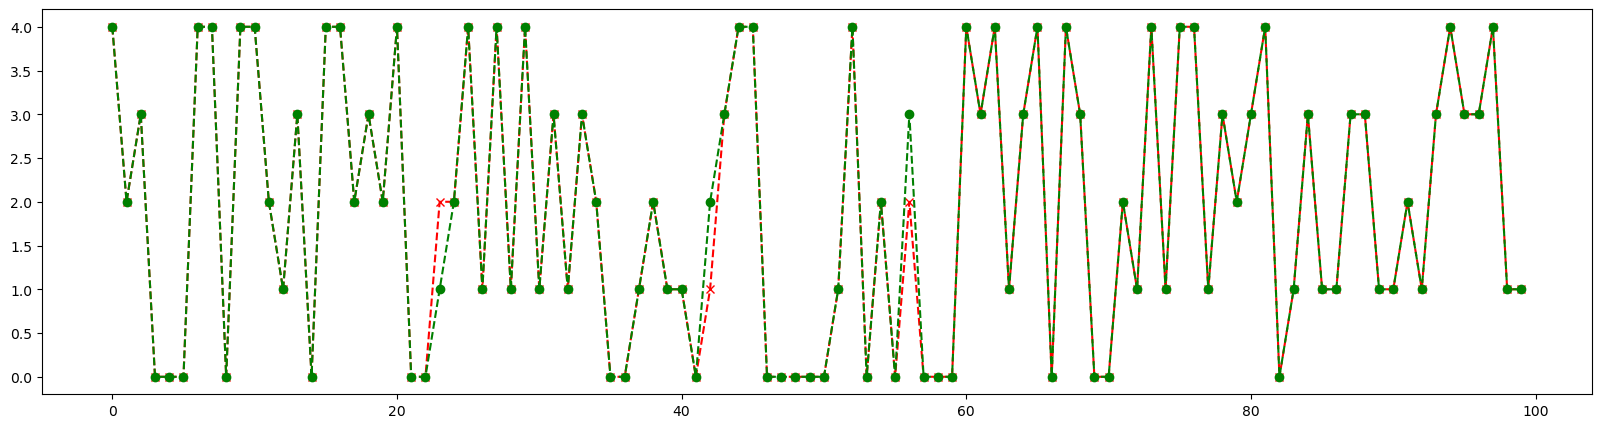

In [23]:
import matplotlib.pyplot as plt
DF = pd.DataFrame()
DF["y_test"] = y_test
DF["predicted"] = predicted_rf
DF.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(DF["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(DF["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

Saving Model

In [24]:
import joblib
joblib.dump(rf,'RFC.pkl')

['RFC.pkl']